In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
constructors = pd.read_csv("./dataset/constructors.csv")
constructor_standings = pd.read_csv("./dataset/constructor_standings.csv")
drivers = pd.read_csv("./dataset/drivers.csv")
results = pd.read_csv("./dataset/results.csv")

In [3]:
german_constructor_ids = constructors[constructors['nationality'].isin(['German', 'East German'])]['constructorId']
constructors.rename(columns={'nationality': 'constructor_nationality'}, inplace=True)

df = pd.merge(constructors, results, on='constructorId')

# Remove \N entries
print(f"Number of rows before removing \\N fastestLapSpeeds: {len(df)}")
df = df[df['fastestLapSpeed'] != '\\N']
print(f"After: {len(df)}")

# Convert the values from strings to floats
df['fastestLapSpeed'] = pd.to_numeric(df['fastestLapSpeed'])

Number of rows before removing \N fastestLapSpeeds: 25840
After: 7379


In [4]:
df = df[['raceId', 'constructorId', 'driverId', 'constructor_nationality', 'fastestLapSpeed']]
df = df.groupby('constructorId')['fastestLapSpeed'].aggregate('mean').reset_index()
mean_fastest_lap_speed = df['fastestLapSpeed'].mean()

display(df)


,constructorId,fastestLapSpeed
0,1,204.094478
1,2,205.012732
2,3,203.045328
3,4,204.536432
4,5,199.884949
5,6,206.045057
6,7,205.806406
7,8,200.260972
8,9,204.943848
9,10,199.712376


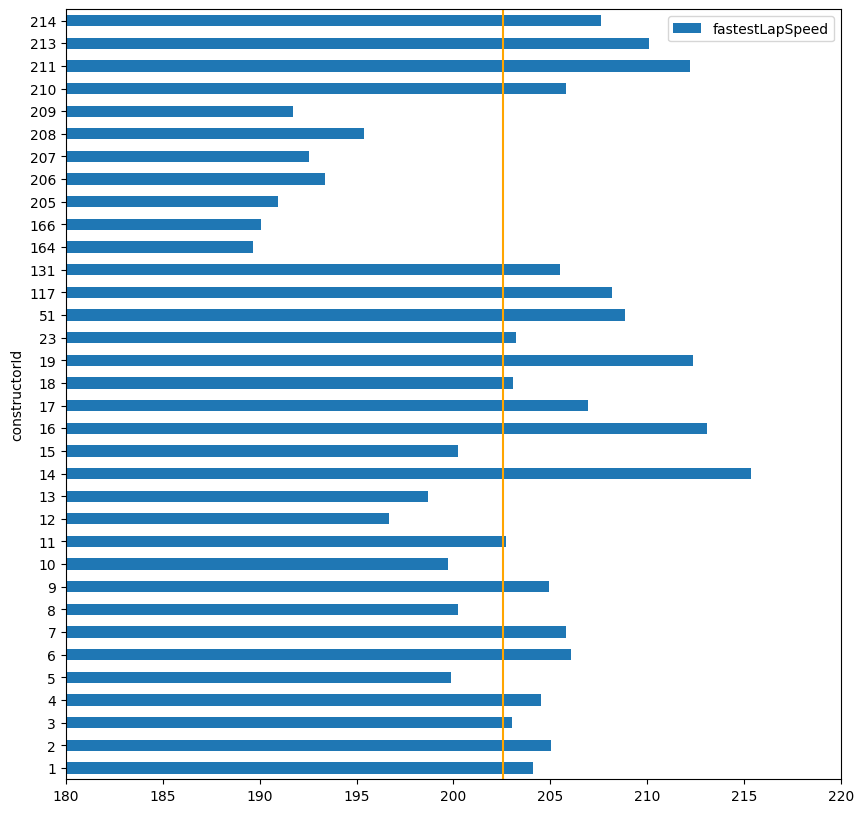

In [5]:
df.plot(kind='barh', y='fastestLapSpeed', x='constructorId', figsize=(10,10), xlim=(180, 220))
plt.vlines(mean_fastest_lap_speed, -1, 300, colors='orange')
plt.show()

# Mercedes (131) indeed is above average!

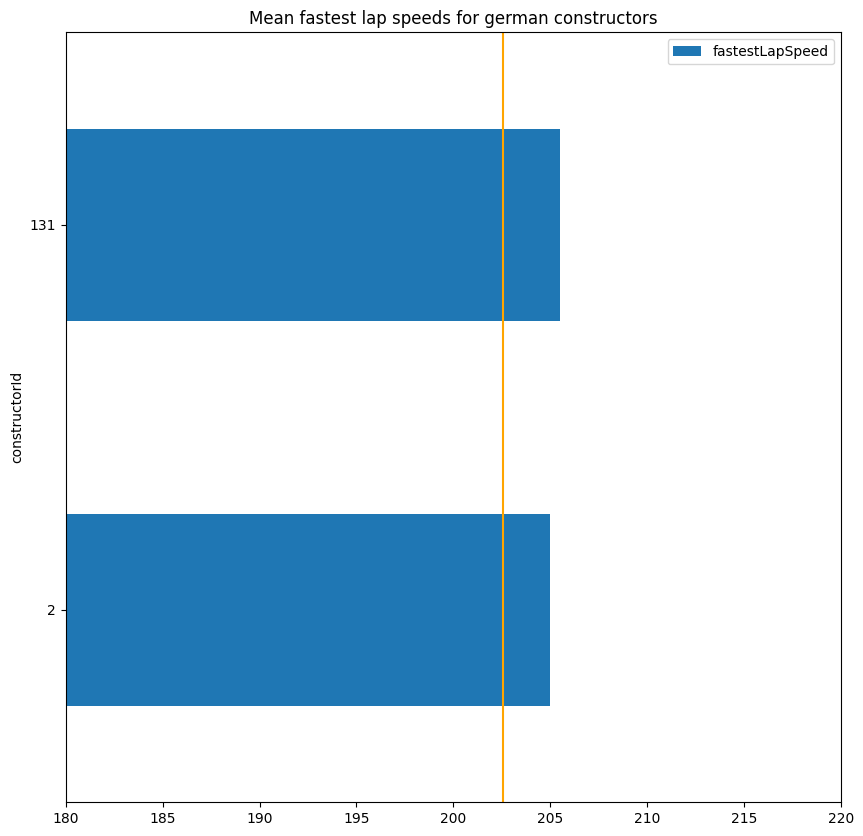

In [6]:
german_team_data = df[df['constructorId'].isin(german_constructor_ids)]

german_team_data.plot(kind='barh', y='fastestLapSpeed', x='constructorId', figsize=(10,10), xlim=(180, 220), title='Mean fastest lap speeds for german constructors')
plt.vlines(mean_fastest_lap_speed, -1, 300, colors=['orange'])
plt.show()

In [7]:
import scipy 

# H0: The mean top speed of german teams is no different than the mean top speed of all teams.
# H1: The mean top speed of german teams is greater than ...

alpha = 0.05
t_result = scipy.stats.ttest_1samp(german_team_data['fastestLapSpeed'], mean_fastest_lap_speed, alternative='greater')

if t_result.pvalue < alpha:
    print(f'One sample T-test p value ({t_result.pvalue}) < alpha ({alpha}). Null hypothesis rejected!')
    print(f"This means that there's enough evidence to say that german teams do have top speeds that are above average.")
else:
    print(f'One sample T-test p value ({t_result.pvalue}) > alpha ({alpha}). Failed to reject null hypothesis!')

One sample T-test p value (0.029636630322187663) < alpha (0.05). Null hypothesis rejected!
This means that there's enough evidence to say that german teams do have top speeds that are above average.
